# DO T TEST, ANOVA

In [7]:
import brainsurf.data.csv as csv
import brainsurf.preprocessing.filtering as filter
import brainsurf.analysis.power_spectrum as ps
import brainsurf.visualization.plot_power_spectrum as ps
import brainsurf.visualization.plot_time_series as ts
import brainsurf.utils.data as ud
import brainsurf.visualization.plot_eeg_signal as plot_eeg
import brainsurf.analysis.stats_analysis as stats
import brainsurf.utils as utils

In [8]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30

# Load the data

### CSV

In [17]:
# # Load sample data CSV file
data = csv.read_csv_eeg('brainsurf\data\samples\sample_data.csv')
data.head()
# aplha - amplitudes of the corresponding frequency bands. at that point

,sec,EEG,alpha,beta,delta,theta
0,2.440,-9.51538,-0.458429,-0.300244,-8.22506,0.938709
1,2.445,-8.83179,-0.477408,-0.096552,-7.79171,0.806110
2,2.450,-7.40356,-0.456316,0.177482,-7.35087,0.663650
3,2.455,-7.04956,-0.390345,0.317293,-6.90547,0.517710
4,2.460,-7.83081,-0.279366,0.224235,-6.45845,0.374589


### EDF

In [19]:
import brainsurf.data.edf as edf
edf_eeg_data = edf.read_edf_to_dataframe('brainsurf\data\samples\sample_data.edf')
edf_eeg_data.head()

,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,EEG C3,EEG C4,...,EEG T6,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00.000,-6.347912,-6.719954,-5.617892,-4.054462,-5.759875,-0.938493,-6.122867,-8.128038,-9.530167,-4.226194,...,-4.215802,-5.217139,-7.674371,-7.109036,-9.485832,-3.571529,-5.231254,-6.412793,-1.008362,-0.020228
2011-01-01 00:00:00.002,-5.884709,-6.252687,-5.759247,-4.416980,-5.196063,-1.827991,-6.589261,-9.575743,-9.312180,-5.382348,...,-5.260952,-5.484781,-8.281969,-7.342156,-9.771729,-3.905135,-6.303942,-6.481980,-0.229777,-0.022628
2011-01-01 00:00:00.004,-5.160955,-5.502956,-5.682461,-4.705095,-4.366181,-2.635460,-6.840396,-11.010668,-8.889476,-6.544596,...,-6.218830,-5.635708,-8.785703,-7.347224,-9.851780,-4.157912,-7.294978,-6.309013,0.636070,-0.027596
2011-01-01 00:00:00.006,-4.313504,-4.624013,-5.377064,-4.863401,-3.415935,-3.268618,-6.571323,-12.111508,-8.199501,-7.458551,...,-6.831871,-5.539115,-9.012470,-6.891118,-9.595616,-4.351903,-7.948197,-5.770342,1.450238,-0.034943
2011-01-01 00:00:00.008,-3.520005,-3.812682,-4.897154,-4.853902,-2.522704,-3.676197,-5.584720,-12.633632,-7.221405,-7.910959,...,-6.902116,-5.090361,-8.834172,-5.811667,-8.930048,-4.545895,-8.066673,-4.826432,2.080561,-0.043553


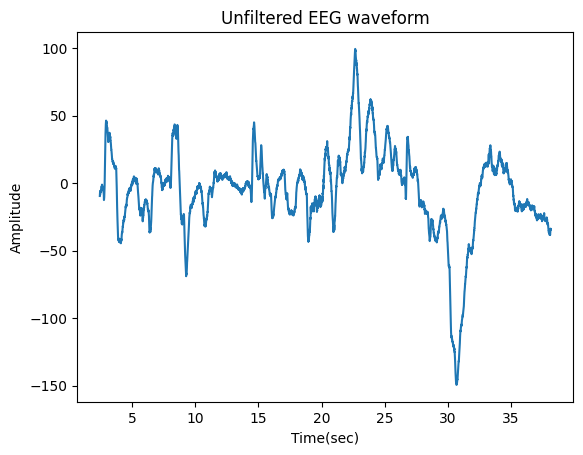

In [20]:
time = utils.data.get_columns(data, ['sec'])
eeg = utils.data.get_columns(data, ['EEG'])
plot_eeg.plot_eeg_signal(time, eeg, 'Unfiltered EEG waveform','Time(sec)','Amplitude')

# Preprocessing

## Filtering

### Bandpass Filter

200.00000000000426


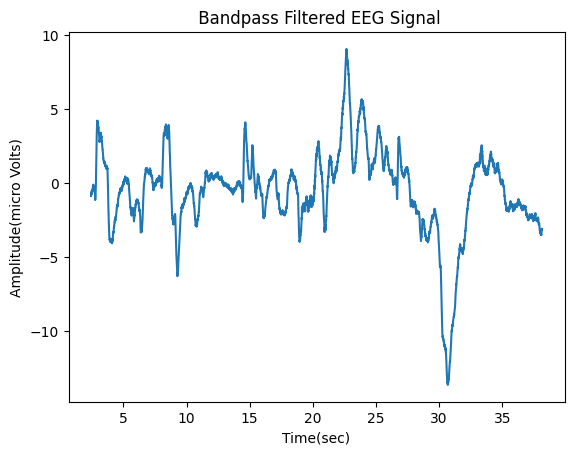

In [21]:
# Filter the data using bandpass filter
sampling_freq = utils.data.estimate_sampling_frequency(utils.data.get_columns(data,['sec']).to_numpy().T)
print(sampling_freq)

bandpass_filtered_eeg = filter.butter_bandpass_filter(utils.data.get_columns(data,['EEG']), lowcut, highcut, sampling_freq, order) 
plot_eeg.plot_eeg_signal(time, bandpass_filtered_eeg, ' Bandpass Filtered EEG Signal','Time(sec)','Amplitude(micro Volts)')

# Feature Extraction

## Time-Domain Features

### Mean

In [22]:
csv_mean=stats.calculate_mean(bandpass_filtered_eeg)
print(csv_mean)

-0.5245457350356737


### Varience

In [23]:
csv_varience=stats.calculate_variance(bandpass_filtered_eeg)
print(csv_varience)

8.48832947388574


### Skewness 

In [24]:
csv_skewness= stats.calculate_skewness(bandpass_filtered_eeg)
print(csv_skewness)

[nan nan nan ... nan nan nan]


c:\Users\Preethi V Hiremath\OneDrive\Desktop\Projects\esp\brainsurf\analysis\stats_analysis.py:32: RuntimeWarning: invalid value encountered in true_divide
  skewness = np.mean(((data - mean[:, np.newaxis]) ** 3), axis=1) / (std ** 3)


### Kurtosis 

In [25]:
csv_kurtosis =stats.calculate_kurtosis(bandpass_filtered_eeg)
print(csv_kurtosis)

[nan nan nan ... nan nan nan]


c:\Users\Preethi V Hiremath\OneDrive\Desktop\Projects\esp\brainsurf\analysis\stats_analysis.py:54: RuntimeWarning: invalid value encountered in true_divide
  kurtosis = np.mean(((data - mean[:, np.newaxis]) ** 4), axis=1) / (std ** 4)


## Frequency-Domain Features

## Power spectral density

In [26]:
import brainsurf.visualization as vis
import brainsurf.analysis.power_spectrum as psd

freqs, psd = psd.psd_welch(bandpass_filtered_eeg[0], sampling_freq)
print(bandpass_filtered_eeg)

c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 10 is greater than input length  = 1, using nperseg = 1
  warnings.warn('nperseg = {0:d} is greater than input length '


[0.]
[[-0.8664721 ]
 [-0.80422428]
 [-0.67416942]
 ...
 [-3.12797141]
 [-3.15909577]
 [-3.13130421]]


## Multi_fractal_spectrum

In [27]:
import numpy as np
from scipy.stats import linregress

def calculate_multi_fractal_spectrum(eeg_data, q_values):
    """
    Calculates the multi-fractal spectrum for EEG data.

    Args:
        eeg_data (numpy.ndarray): EEG data array of shape (channels, samples).
        q_values (list): List of q values for which to calculate the spectrum.

    Returns:
        numpy.ndarray: Multi-fractal spectrum array of shape (2, len(q_values)),
                       where the first row corresponds to f(alpha) and the second
                       row corresponds to D(q).
    """
    # Calculate the wavelet leaders for each channel
    wavelet_leaders = []
    for channel in eeg_data:
        wavelet_coefficients = np.abs(np.fft.fft(channel)) ** 2
        wavelet_leaders.append(np.cumsum(wavelet_coefficients[::-1])[::-1])

    wavelet_leaders = np.array(wavelet_leaders)

    # Calculate the q-th order moments
    moments = []
    for q in q_values:
        moments.append(np.mean(wavelet_leaders ** q, axis=0))

    moments = np.array(moments)

    # Calculate the singularity spectrum
    f_alpha = []
    D_q = []
    for moment in moments:
        x = np.log(np.arange(1, len(moment)+1))
        # alpha, _, _, _, _ = linregress(x, np.log(moment))
        alpha, _, _, _, _ = linregress(np.log(np.arange(1, len(moment) + 1)), np.log(moment))

        f_alpha.append(alpha)
        D_q.append(alpha / (q_values - 1))

    spectrum = np.array([f_alpha, D_q])

    return spectrum

# Example usage:
eeg_data = np.random.rand(20, 1000)  # generate random EEG data of 20 channels and 1000 samples
q_values = np.arange(-5, 6)  # specify the q values for which to calculate the spectrum
spectrum = calculate_multi_fractal_spectrum(eeg.to_numpy().T, q_values)
print(spectrum)


[[0.04729741412735561 0.037837931301884495 0.02837844847641336
  0.018918965650942247 0.009459482825471124 0.0 -0.009459482825471122
  -0.01891896565094225 -0.028378448476413375 -0.03783793130188449
  -0.04729741412735562]
 [array([-0.0078829 , -0.00945948, -0.01182435, -0.0157658 , -0.02364871,
         -0.04729741,         inf,  0.04729741,  0.02364871,  0.0157658 ,
          0.01182435])
  array([-0.00630632, -0.00756759, -0.00945948, -0.01261264, -0.01891897,
         -0.03783793,         inf,  0.03783793,  0.01891897,  0.01261264,
          0.00945948])
  array([-0.00472974, -0.00567569, -0.00709461, -0.00945948, -0.01418922,
         -0.02837845,         inf,  0.02837845,  0.01418922,  0.00945948,
          0.00709461])
  array([-0.00315316, -0.00378379, -0.00472974, -0.00630632, -0.00945948,
         -0.01891897,         inf,  0.01891897,  0.00945948,  0.00630632,
          0.00472974])
  array([-0.00157658, -0.0018919 , -0.00236487, -0.00315316, -0.00472974,
         -0.0094594

C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_16348\328560637.py:40: RuntimeWarning: divide by zero encountered in true_divide
  D_q.append(alpha / (q_values - 1))
C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_16348\328560637.py:40: RuntimeWarning: invalid value encountered in true_divide
  D_q.append(alpha / (q_values - 1))
C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_16348\328560637.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spectrum = np.array([f_alpha, D_q])


ValueError: setting an array element with a sequence.

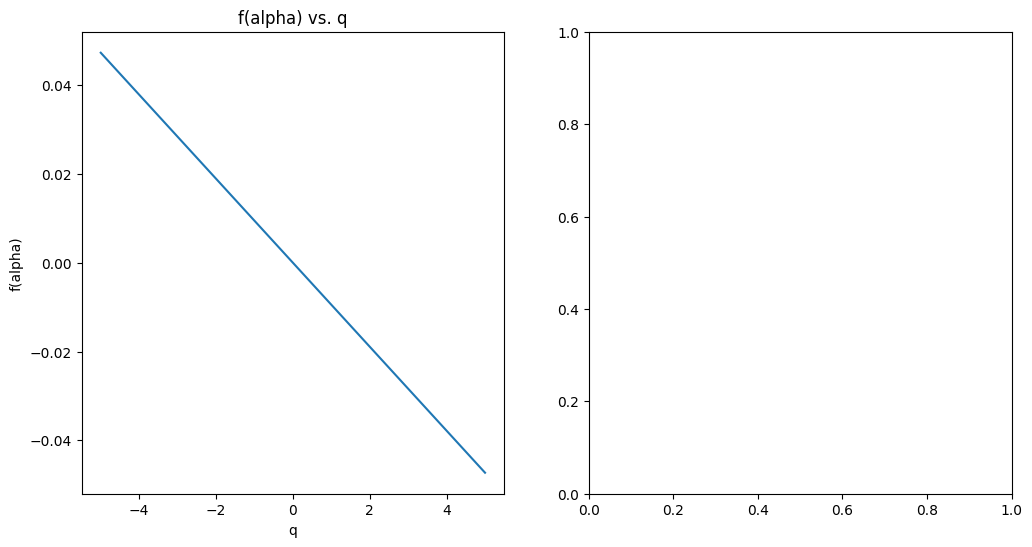

In [28]:
# Extract f(alpha) and D(q)
import matplotlib.pyplot as plt
f_alpha = spectrum[0]
D_q = spectrum[1]

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(q_values, f_alpha)
plt.xlabel('q')
plt.ylabel('f(alpha)')
plt.title('f(alpha) vs. q')

plt.subplot(122)
plt.plot(q_values, D_q)
plt.xlabel('q')
plt.ylabel('D(q)')
plt.title('D(q) vs. q')

plt.tight_layout()
plt.show()

# Use the Inhouse Class

In [ ]:
from brainsurf.data.eeg_data import EEGDataFactory
factory = EEGDataFactory()
data = factory.create_eeg_data(input_file='brainsurf\data\samples\sample_data.csv')
data_summary = data.summary(300)
keys = data.keys()
print(keys)

# Graphs

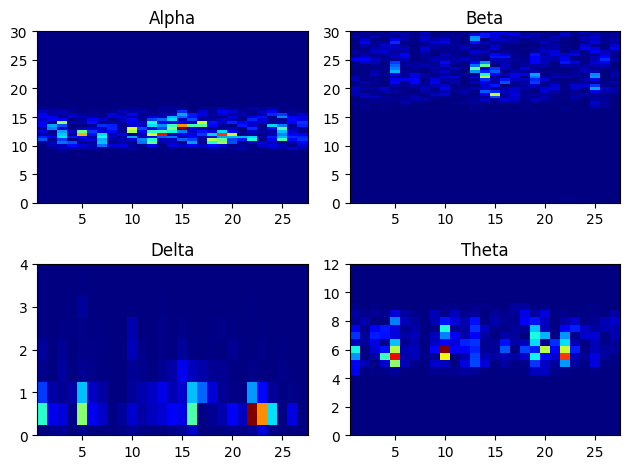

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


# Define the sampling frequency and time vector
fs = 250  # Hz
t = data["sec"].values

# Get the EEG data for each frequency band
alpha = data["alpha"].values
beta = data["beta"].values
delta = data["delta"].values
theta = data["theta"].values

# Define the frequency ranges for the spectrogram
f_alpha = [8, 12]
f_beta = [12, 30]
f_delta = [0.5, 4]
f_theta = [4, 8]

# Define the window size and overlap for the spectrogram
win = fs * 2  # 2 seconds
overlap = fs  # 1 second

# Generate the spectrogram for each frequency band
f, t_spec, S_alpha = signal.spectrogram(alpha, fs=fs, window="hamming", nperseg=win, noverlap=overlap)
f, t_spec, S_beta = signal.spectrogram(beta, fs=fs, window="hamming", nperseg=win, noverlap=overlap)
f, t_spec, S_delta = signal.spectrogram(delta, fs=fs, window="hamming", nperseg=win, noverlap=overlap)
f, t_spec, S_theta = signal.spectrogram(theta, fs=fs, window="hamming", nperseg=win, noverlap=overlap)

# Plot the spectrograms
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].pcolormesh(t_spec, f, S_alpha, cmap="jet")
ax[0, 0].set_title("Alpha")
ax[0, 0].set_ylim([0, 30])
ax[0, 1].pcolormesh(t_spec, f, S_beta, cmap="jet")
ax[0, 1].set_title("Beta")
ax[0, 1].set_ylim([0, 30])
ax[1, 0].pcolormesh(t_spec, f, S_delta, cmap="jet")
ax[1, 0].set_title("Delta")
ax[1, 0].set_ylim([0, 4])
ax[1, 1].pcolormesh(t_spec, f, S_theta, cmap="jet")
ax[1, 1].set_title("Theta")
ax[1, 1].set_ylim([0, 12])
fig.tight_layout()
plt.show()


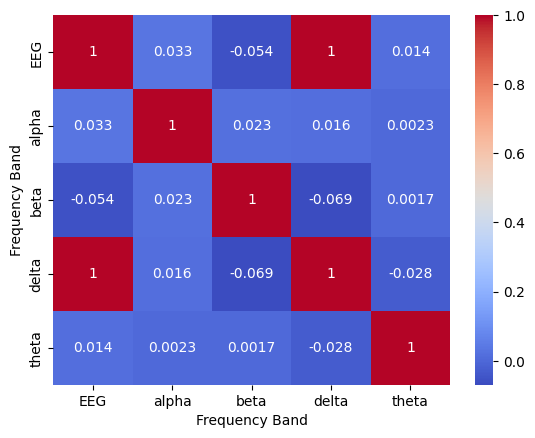

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = data.drop("sec", axis=1)
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.xlabel("Frequency Band")
plt.ylabel("Frequency Band")
plt.show()

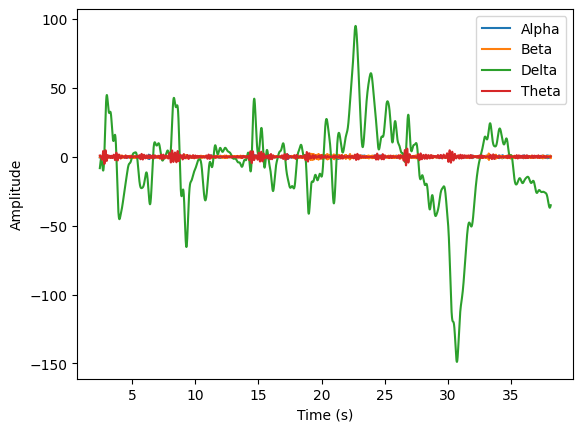

In [ ]:
# Line plot: A line plot can be used to visualize the amplitude of each frequency band over time.
#  This can help to identify any patterns or trends in the data.
import matplotlib.pyplot as plt

plt.plot(data['sec'], data['alpha'], label='Alpha')
plt.plot(data['sec'], data['beta'], label='Beta')
plt.plot(data['sec'], data['delta'], label='Delta')
plt.plot(data['sec'], data['theta'], label='Theta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


Box plot: A box plot can be used to compare the distribution of amplitudes across the different frequency bands. This can help to identify any differences or similarities between the frequency bands.

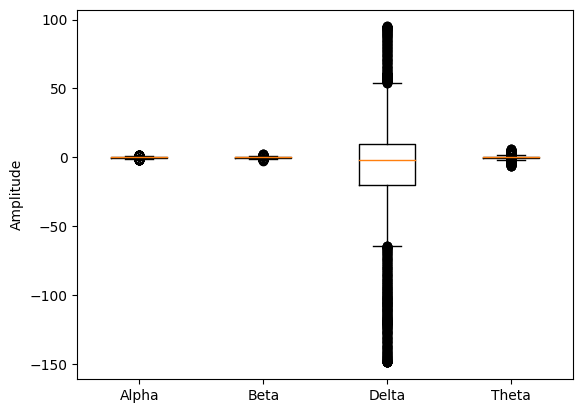

In [ ]:
data = [data['alpha'], data['beta'], data['delta'], data['theta']]
plt.boxplot(data, labels=['Alpha', 'Beta', 'Delta', 'Theta'])
plt.ylabel('Amplitude')
plt.show()

In [ ]:
#Filter using Notch filter
# notch_filtered_data = filter.notch_filter(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq, 50, q)
# notch_filtered_data=notch_filtered_data.ravel()
# plot_eeg.plot_eeg_signal(time, notch_filtered_data, 'Notch Filtered EEG Signal(1-50Hz)','Time(sec)','Amplitude(micro Volts)')

In [ ]:
# calculate relative power of alpha, beta, and theta bands
delta_power, theta_power , alpha_power, beta_power= stats.calculate_relative_power(freqs, psd)

In [ ]:
# print('Relative Power - Alpha: ', alpha_power)
# print('Relative Power - Beta: ', beta_power)
# print('Relative Power - Theta: ', theta_power)
# print('Relative Power - Delta: ', delta_power)

In [ ]:
notch_filtered_data

array([ -9.27256923,  -8.60642289,  -7.68786764, ..., -34.08919772,
       -34.62875288, -34.63432755])

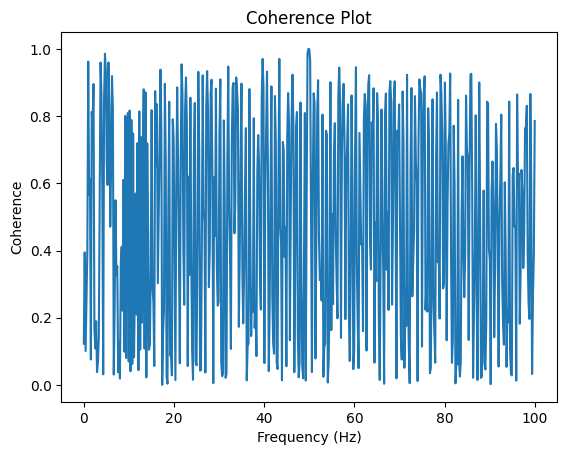

In [ ]:
coherence, freqs =  stats.calculate_coherence(data['alpha'].to_numpy().T , data['theta'].to_numpy().T, sampling_freq )
# print('Coherence - Alpha/Theta: ', coherence)
plot_eeg.plot_eeg_signal(coherence, freqs, 'Coherence Plot','Frequency (Hz)','Coherence')

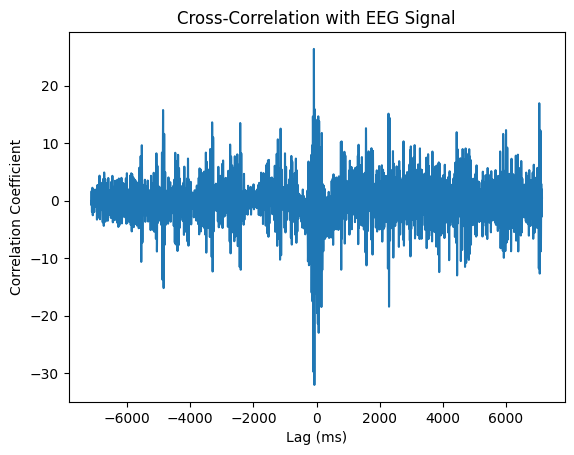

In [ ]:
# calculate coherence between alpha and theta bands
lags, xcorr_alpha = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
_, xcorr_beta = stats.calculate_cross_correlation(data['alpha'].to_numpy().T , data['theta'].to_numpy().T)
import matplotlib.pyplot as plt
# plot the cross-correlation functions
# plt.plot(lags, xcorr_alpha, label='Alpha')
# plt.plot(lags, xcorr_beta, label='Beta')
plot_eeg.plot_eeg_signal(xcorr_alpha,lags, 'Cross-Correlation with EEG Signal','Lag (ms)','Correlation Coefficient')

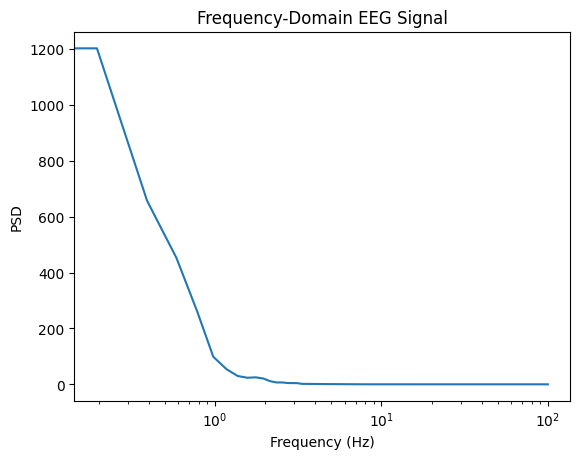

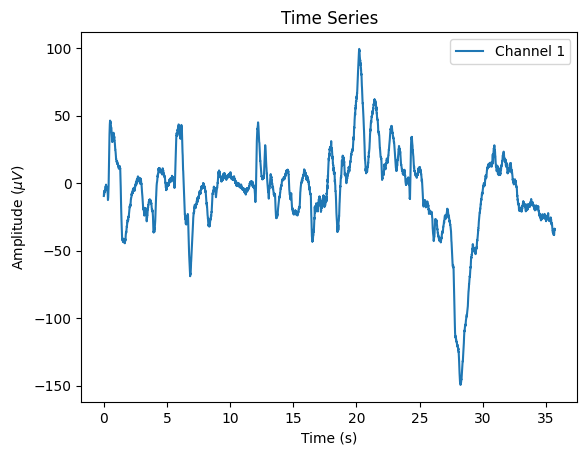

In [ ]:
ps.welch_power_spectrum(data,200)
ts.plot_time_series(ud.get_columns(data, ['EEG']).to_numpy().T, sampling_freq)
